# Part 2-Data Manipulation & Cleaning
Author: Joshua Chemparathy <br>
Purpose: AMS Lead Energy Analyst Assessment Project (Part 2-Data Manipulation & Cleaning) <br>
Date: March 1, 2019 <br>
Last Modified: March 3, 2019 <br>

## Data Manipulation and Cleaning

In [6]:
import pandas as pd

df = pd.read_excel('AMS_SampleDataSet.xlsx')
#Simplified Alternative: df = pd.read_excel('AMS_SampleDataSet.xlsx',header=3,index_col ='Date')

#Not necessary, but saved the basic file information to be able to automatically refer to the customer name and/or report range.
file_daterange = list(map(str.strip,df.iloc[0][2].split('to')))
dict_file_header = {df.iloc[1].index[0]: df.iloc[1].index[2], df.iloc[0][0]+' Start': file_daterange[0], df.iloc[0][0]+' End': file_daterange[1]}
print(dict_file_header)

df

{'Customer Name': 'CUSTOM R BLDG A', 'Report Period Start': '9/13/2014', 'Report Period End': '9/13/2016'}


,Customer Name,Unnamed: 1,CUSTOM R BLDG A,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100
0,Report Period,NaN,9/13/2014 to 9/13/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Service Account No,Date,Meter Number,Unit of Measurement,NaN,00:00,00:15,00:30,00:45,01:00,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
3,40508185,2014-09-13 00:00:00,V349N-001362,KWH_DEL,NaN,27,27.6,29.4,27.6,28.2,...,31.8,30.6,31.8,31.2,31.8,31.8,31.8,31.2,32.4,31.2
4,40508185,2014-09-13 00:00:00,V349N-001362,KW_DEL,NaN,108,110.4,117.6,110.4,112.8,...,127.2,122.4,127.2,124.8,127.2,127.2,127.2,124.8,129.6,124.8
5,40508185,2014-09-14 00:00:00,V349N-001362,KWH_DEL,NaN,32.4,31.2,31.8,32.4,31.8,...,32.4,31.2,32.4,32.4,31.8,32.4,31.2,32.4,31.8,31.8
6,40508185,2014-09-14 00:00:00,V349N-001362,KW_DEL,NaN,129.6,124.8,127.2,129.6,127.2,...,129.6,124.8,129.6,129.6,127.2,129.6,124.8,129.6,127.2,127.2
7,40508185,2014-09-15 00:00:00,V349N-001362,KWH_DEL,NaN,33,33,31.2,32.4,32.4,...,32.4,32.4,31.2,31.8,31.2,31.2,31.8,31.2,31.8,30.6
8,40508185,2014-09-15 00:00:00,V349N-001362,KW_DEL,NaN,132,132,124.8,129.6,129.6,...,129.6,129.6,124.8,127.2,124.8,124.8,127.2,124.8,127.2,122.4
9,40508185,2014-09-16 00:00:00,V349N-001362,KWH_DEL,NaN,32.4,31.2,31.8,31.2,31.2,...,37.2,37.2,32.4,32.4,33.6,32.4,33.6,33,33.6,33


In [2]:
# Manually set column names, dropped extra header rows, set index to account/meter#/date, and dropped column with all nan values
df.columns = df.iloc[2].values
df_mod = (df[3:].set_index(['Service Account No', 'Meter Number','Date'])
                .dropna(axis=1,how='all'))

# Reduce dataframe to only rows with kW, removing kWh, and dropped the UoM column
df_kw = df_mod[df_mod['Unit of Measurement'] == 'KW_DEL'].drop(columns='Unit of Measurement')

# convert columns from object type to datetime type
df_kw.columns = pd.to_timedelta(df_kw.columns+ ':00')

#Check to see if there is any data missing
print('Is there any data missing? {0}. How many are missing in the dataframe? {1}.'.format(str(df_kw.isna().values.any()), df_kw.isna().sum().sum()))

# split data frame by Meter Number. Could add a for loop to automaticaly grab all unique meter numbers. ( for x in df_kw.index.get_level_values(1).unique(): ...etc)
df_001362 = (df_kw[df_kw.index.get_level_values(1)=='V349N-001362'],'V349N-001362')
df_017182 = (df_kw[df_kw.index.get_level_values(1)=='V349N-017182'],'V349N-017182')

Is there any data missing? True. How many are missing in the dataframe? 889.


In [3]:
# stack_df method is to manipulate the two similar meter dataframes

def stack_df(arg_df):
    # stack the kW values by indexs so that time columns and values are stacked in order and by index
    df_stack = arg_df[0].stack(dropna=False)
    # Make new index with combined date/time, name column with corresponding meter, and 
    df_stack.index = [df_stack.index.get_level_values(2) + df_stack.index.get_level_values(3)]
    df_stack = df_stack.reset_index()
    df_stack.columns = ['Date', arg_df[1] + ' kW']
    df_stack = df_stack.set_index('Date')
    
    # Filled in non-DLS NaN values with the previous available value, which I believe the CAISO does; however, could also fill in NaN values with df_001362_mod.median() or median of values surround missing values    
    # Excluded Daylight Savings Month from being filled in and dropped them.
    # Expected November to have an extra hour, but I don't see that in this dataset.
    df_stack[df_stack.index.month!=3] = df_stack[df_stack.index.month!=3].fillna(method='ffill')
    df_stack = df_stack.dropna()
    return df_stack

#run method for both meters
df_001362_mod = stack_df(df_001362)
df_017182_mod = stack_df(df_017182)


In [5]:
# Merge the two meter dataframes together by the date
meter_merge = pd.merge(df_001362_mod, df_017182_mod, how='inner', left_index=True, right_index=True)


meter_merge

,V349N-001362 kW,V349N-017182 kW
Date,,
2014-09-13 00:00:00,108,28.8
2014-09-13 00:15:00,110.4,28.8
2014-09-13 00:30:00,117.6,31.2
2014-09-13 00:45:00,110.4,24
2014-09-13 01:00:00,112.8,26.4
2014-09-13 01:15:00,115.2,28.8
2014-09-13 01:30:00,115.2,24
2014-09-13 01:45:00,115.2,26.4
2014-09-13 02:00:00,112.8,28.8


In [12]:
#export data into excel for submission
meter_merge.to_excel('Part2_DataManipulation_Cleaning.xlsx')

## Visualization

In [13]:
# Only look at business hours data, between 800 and 1700.
weekday = meter_merge[((meter_merge.index.weekday>=0) & (meter_merge.index.weekday<=4))]
weekday_bus = weekday.between_time('08:00:00', '17:00:00')

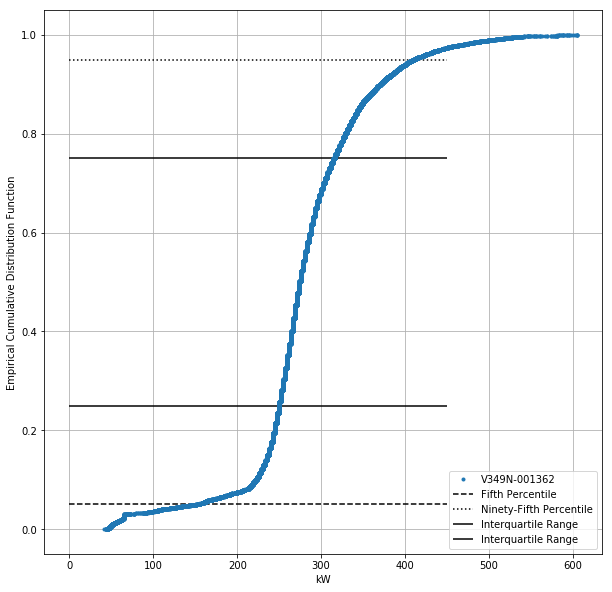

Range(max,min):  604.8 40.8
The interquartile range (75th percentile - 25th percentile):  67.20000000000002
5th Percentile:  153.6
95th Percentile:  410.4


In [15]:
# Cumulative Distribution Function for V349N-001362

import matplotlib.pyplot as plt
import numpy as np

# sort the data to prep for cumulative distribution function
x_001362=np.sort(weekday_bus['V349N-001362 kW'])
# create range for the y axis
y_001362= np.arange(1,len(x_001362)+1)/len(x_001362)
# modify the plot size
fig, ecdf_001362= plt.subplots(figsize=(10,10))

# plot the ECDF and set x and y label
ecdf_001362=plt.plot(x_001362,y_001362,marker='.',linestyle='None',label='V349N-001362')
plt.xlabel('kW')
plt.ylabel('Empirical Cumulative Distribution Function')

#add grid lines
plt.grid() 
# line to show 5th percentile
plt.hlines(.05,0,450,label='Fifth Percentile',linestyles='dashed')
#line to mark 95th percentile
plt.hlines(.95,0,450,label='Ninety-Fifth Percentile',linestyles='dotted')
#lines to show interquartile range
plt.hlines(.75,0,450,label='Interquartile Range',linestyles='solid')
plt.hlines(.25,0,450,label='Interquartile Range',linestyles='solid')

#create a legend and show the plot
plt.legend(loc='lower right')
plt.show()

# Percentile statistics
#get the maximum and minimum values of the kW load
print('Range(max,min): ', weekday_bus['V349N-001362 kW'].max(),weekday_bus['V349N-001362 kW'].min())
#calculate the interquartile range
q75, q25 = np.percentile(weekday_bus['V349N-001362 kW'], [75 ,25])
iqr = q75 - q25
print('The interquartile range (75th percentile - 25th percentile): ', iqr)
#calculate 5th and 95th quartile
q5 = np.percentile(weekday_bus['V349N-001362 kW'], 5)
q95 = np.percentile(weekday_bus['V349N-001362 kW'], 95)
print('5th Percentile: ', q5)
print('95th Percentile: ', q95)



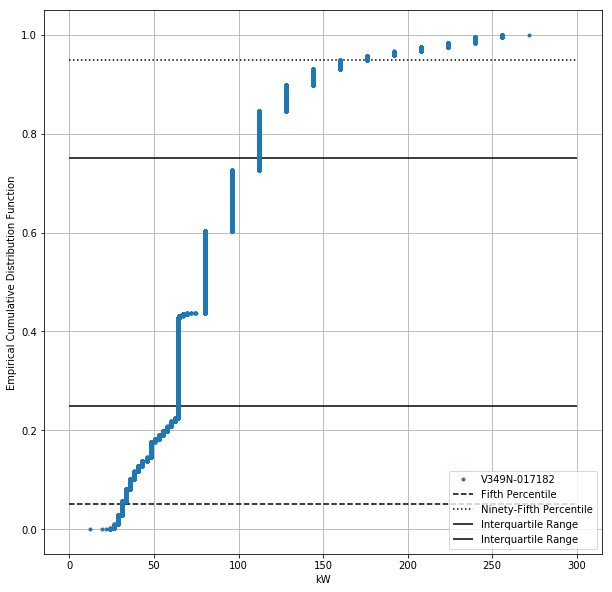

Range(max,min):  272.0 12.0
The interquartile range (75th percentile - 25th percentile):  48.0
5th Percentile:  31.199999999999996
95th Percentile:  176.0


In [7]:
# Cumulative Distribution Function for V349N-017182

# sort the data to prep for cumulative distribution function
x_017182=np.sort(weekday_bus['V349N-017182 kW'])
# create range for the y axis
y_017182= np.arange(1,len(x_017182)+1)/len(x_017182)
# modify the plot size
fig, ecdf_001362= plt.subplots(figsize=(10,10))

# plot the ECDF and set x and y label
ecdf_017182=plt.plot(x_017182,y_017182,marker='.',linestyle='None',label='V349N-017182')
plt.xlabel('kW')
plt.ylabel('Empirical Cumulative Distribution Function')

#add grid lines
plt.grid() 
# line to show 5th percentile
plt.hlines(.05,0,300,label='Fifth Percentile',linestyles='dashed')
#line to mark 95th percentile
plt.hlines(.95,0,300,label='Ninety-Fifth Percentile',linestyles='dotted')
#lines to show interquartile range
plt.hlines(.75,0,300,label='Interquartile Range',linestyles='solid')
plt.hlines(.25,0,300,label='Interquartile Range',linestyles='solid')

#create a legend and show the plot
plt.legend(loc='lower right')
plt.show()

# Percentile statistics
#get the maximum and minimum values of the kW load
print('Range(max,min): ', weekday_bus['V349N-017182 kW'].max(),weekday_bus['V349N-017182 kW'].min())
#calculate the interquartile range
q75, q25 = np.percentile(weekday_bus['V349N-017182 kW'], [75 ,25])
iqr = q75 - q25
print('The interquartile range (75th percentile - 25th percentile): ', iqr)
#calculate 5th and 95th quartile
q5 = np.percentile(weekday_bus['V349N-017182 kW'], 5)
q95 = np.percentile(weekday_bus['V349N-017182 kW'], 95)
print('5th Percentile: ', q5)
print('95th Percentile: ', q95)



Text(0, 0.5, 'kW')

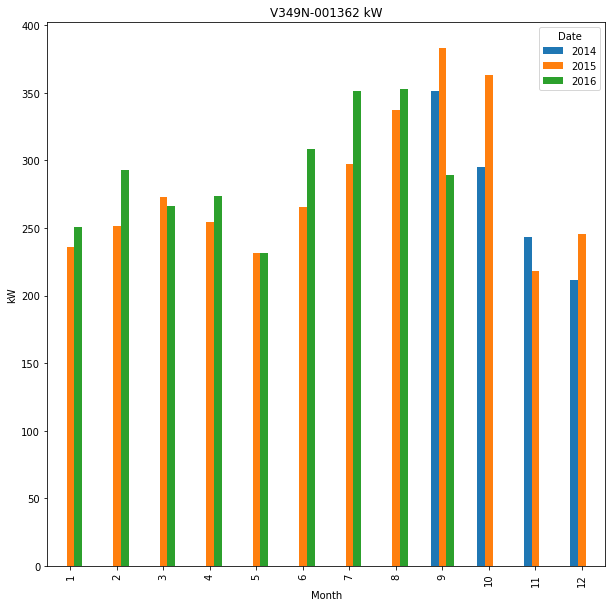

In [16]:
#Create a month over month bar chart of mean kW. 

#copied all of the data for weekday business hours
mean_month_001362=weekday_bus
#converted the data to numbers, because it was an object
mean_month_001362 = pd.to_numeric(mean_month_001362['V349N-001362 kW'])
#converted the index back to datetime
mean_month_001362.index = pd.to_datetime(mean_month_001362.index)
#converted the now series back to a dataframe
mean_month_001362 = mean_month_001362.to_frame()

#created a pivot table for each month in the year and took the mean of all median daily values
pivot = pd.pivot_table(mean_month_001362, index=mean_month_001362.index.month, columns=mean_month_001362.index.year,values='V349N-001362 kW', aggfunc='mean')

#created a bar chart to compare
bar=pivot.plot(kind='bar',figsize=(10,10), title='V349N-001362 kW')
bar.set_xlabel("Month")
bar.set_ylabel("kW")

Text(0, 0.5, 'kW')

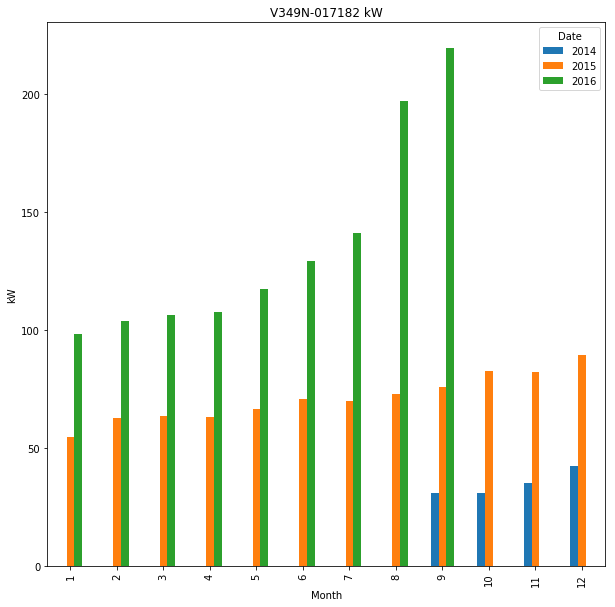

In [17]:
#Create a month over month bar chart of mean kW. 

#copied all of the data for weekday business hours
mean_month_017182=weekday_bus
#converted the data to numbers, because it was an object
mean_month_017182 = pd.to_numeric(mean_month_017182['V349N-017182 kW'])
#converted the index back to datetime
mean_month_017182.index = pd.to_datetime(mean_month_017182.index)
#converted the now series back to a dataframe
mean_month_017182 = mean_month_017182.to_frame()

#created a pivot table for each month in the year and took the mean of all median daily values
pivot = pd.pivot_table(mean_month_017182, index=mean_month_017182.index.month, columns=mean_month_017182.index.year,values='V349N-017182 kW', aggfunc='mean')

#created a bar chart to compare
bar=pivot.plot(kind='bar',figsize=(10,10), title='V349N-017182 kW')
bar.set_xlabel("Month")
bar.set_ylabel("kW")


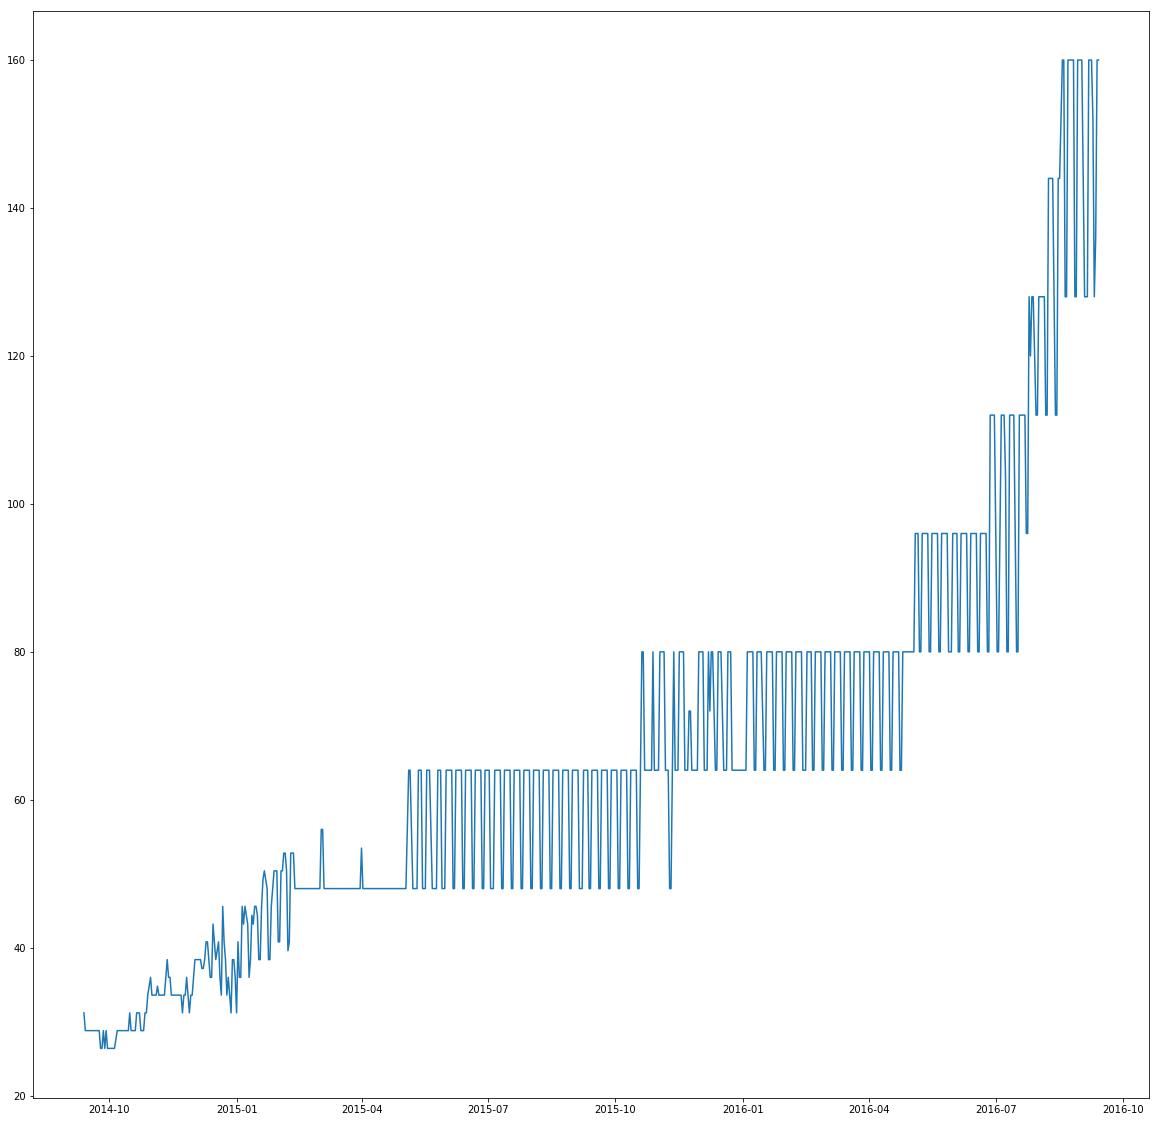

In [18]:
## not used, but graphing the median kW per day over the provided period
median_byday_017182=meter_merge
median_byday_017182 = pd.to_numeric(median_byday_017182['V349N-017182 kW'])
median_byday_017182 = median_byday_017182.groupby(median_byday_017182.index.date).agg(np.median)
median_byday_017182.plot(figsize=(20,20))